In [19]:
from utilities3 import *
from timeit import default_timer

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import torch
print(torch.__version__)

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
#from torchinfo import summary
import sys
import netCDF4 as nc
from data_loader_SSH_two_step import load_test_data
from data_loader_SSH_two_step import load_train_data
from count_trainable_params import count_parameters
import hdf5storage
from saveNCfile import savenc


from matplotlib import animation
from IPython.display import HTML
from celluloid import Camera


2.0.1+cu117


In [13]:
arrayfile_path = '/data/ODAP_datastore/DA_results/11_01_23/'
data_path = '/data/ODAP_datastore/ocean_data/'

In [32]:
loaded_data = np.load(arrayfile_path + 'OceanNet_DA_results_LM_sigma_2.0_DAcycle_2.npz')

In [33]:
print(loaded_data.files)

['DA', 'noDA', 'truth']


In [34]:
def get_lat_lon():
    FF=nc.Dataset(data_path + 'EnKF_surface_2020_5dmean_gom.nc')
    lat_vals = np.asarray(FF['lat_rho'])
    lon_vals = np.asarray(FF['lon_rho'])
    
    return lat_vals, lon_vals

lat_vals, lon_vals = get_lat_lon()

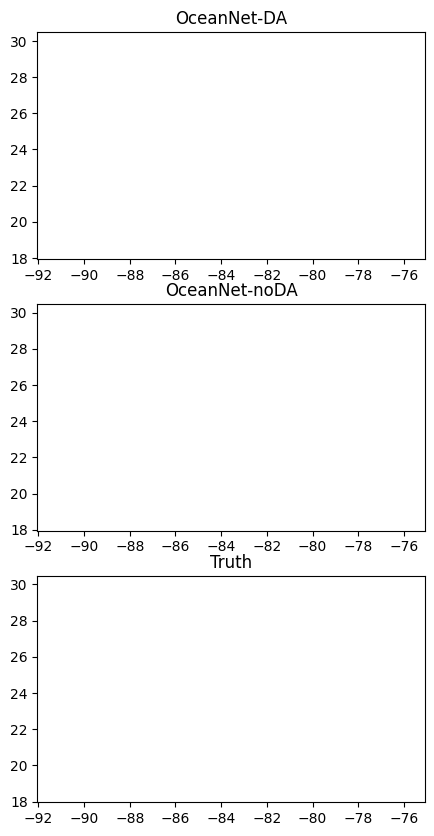

In [35]:
fig, ax = plt.subplots(nrows=3, ncols=1,figsize=(5,10))
camera = Camera(fig)


for snap_time in range(21):

    ax[0].contourf(lon_vals, lat_vals, loaded_data['DA'][snap_time,0,:,:], 15, cmap='YlGn')
    ax[0].set_title('OceanNet-DA')
    # plt.colorbar(im, ax=ax[0])

    ax[1].contourf(lon_vals, lat_vals, loaded_data['noDA'][snap_time,0,:,:], 15, cmap='YlGn')
    ax[1].set_title('OceanNet-noDA')
    # plt.colorbar(im1, ax=ax[1])

    ax[2].contourf(lon_vals, lat_vals, loaded_data['truth'][snap_time,0,:,:], 15, cmap='YlGn')
    ax[2].set_title('Truth')
    # plt.colorbar(im2, ax=ax[2])
    
    ax[0].text(0.4, 1.2, 'day = ' + str((snap_time+1)*5) + ' hrs', transform=ax[0].transAxes)
    
    camera.snap()
    
ani2 = camera.animate()
HTML(ani2.to_html5_video())
    
    
    